In [ ]:
!git clone https://github.com/scikit-learn/scikit-learn.git
!pip install scikit-learn
# First we will import the necessary Library

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

fatal: destination path 'scikit-learn' already exists and is not an empty directory.


In [ ]:
maindf=pd.read_csv('/content/ETHUSD.csv')

In [ ]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  2297
Total number of fields present in the dataset:  7


In [ ]:
maindf.shape

(2297, 7)

In [ ]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,7/8/2015,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0
1,7/9/2015,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0
2,7/10/2015,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0
3,7/11/2015,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0
4,7/12/2015,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0


In [ ]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2292,10/16/2021,NaN,NaN,NaN,NaN,NaN,NaN
2293,10/17/2021,NaN,NaN,NaN,NaN,NaN,NaN
2294,10/18/2021,NaN,NaN,NaN,NaN,NaN,NaN
2295,10/19/2021,NaN,NaN,NaN,NaN,NaN,NaN
2296,10/20/2021,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2297 non-null   object 
 1   Open       2262 non-null   float64
 2   High       2262 non-null   float64
 3   Low        2262 non-null   float64
 4   Close      2262 non-null   float64
 5   Adj Close  2262 non-null   float64
 6   Volume     2262 non-null   float64
dtypes: float64(6), object(1)
memory usage: 125.7+ KB


In [ ]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2.262000e+03
mean,504.643794,523.874192,483.580502,506.243005,506.243005,7.651589e+09
std,815.447289,847.466491,780.110901,818.223291,818.223291,1.082828e+10
min,0.431589,0.482988,0.420897,0.434829,0.434829,1.021280e+05
25%,15.396625,15.939850,14.291450,15.483300,15.483300,5.144278e+07
50%,208.800750,213.967026,202.311622,208.977218,208.977218,2.423995e+09
75%,447.946007,465.080513,431.290749,449.149490,449.149490,1.104452e+10
max,4174.635742,4362.350586,3868.994385,4168.701172,4168.701172,8.448291e+10


In [ ]:
print('Null Values:',maindf.isnull().values.sum())
print('NA values:',maindf.isnull().values.any())

Null Values: 210
NA values: True


In [ ]:
maindf=maindf.dropna()
print('Null Values:',maindf.isnull().values.sum())
print('NA values:',maindf.isnull().values.any())

Null Values: 0
NA values: False


In [ ]:
sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 7/8/2015
Ending Date 9/20/2021


In [ ]:
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2262, 2)


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Ethereum close price 2014-2022', plot_bgcolor='white',
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
closedf = closedf[closedf['Date'] > '2015-02-19']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  1354


In [ ]:
closedf

,Date,Close
0,7/8/2015,2.772120
1,7/9/2015,0.753325
2,7/10/2015,0.701897
3,7/11/2015,0.708448
4,7/12/2015,1.067860
...,...,...
2261,9/15/2021,3862.634766
2262,9/16/2021,3830.382080
2263,9/17/2021,3847.104492
2264,9/18/2021,3748.760254


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Ethereum close price',
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(1354, 1)


In [ ]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (947, 1)
test_data:  (407, 1)


In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (931, 15)
y_train:  (931,)
X_test:  (391, 15)
y_test (391,)


In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (931, 15, 1)
X_test:  (391, 15, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

model = Sequential()

model.add(SimpleRNN(10, input_shape=(None, 1), activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error", optimizer="adam")

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
30/30 [==============================] - 3s 24ms/step - loss: 0.0013 - val_loss: 0.0780
Epoch 2/200
30/30 [==============================] - 0s 10ms/step - loss: 3.7330e-04 - val_loss: 0.0574
Epoch 3/200
30/30 [==============================] - 0s 15ms/step - loss: 1.1033e-04 - val_loss: 0.0341
Epoch 4/200
30/30 [==============================] - 1s 19ms/step - loss: 3.7601e-05 - val_loss: 0.0264
Epoch 5/200
30/30 [==============================] - 0s 10ms/step - loss: 2.6981e-05 - val_loss: 0.0232
Epoch 6/200
30/30 [==============================] - 0s 10ms/step - loss: 2.4203e-05 - val_loss: 0.0211
Epoch 7/200
30/30 [==============================] - 0s 10ms/step - loss: 2.1610e-05 - val_loss: 0.0200
Epoch 8/200
30/30 [==============================] - 0s 9ms/step - loss: 1.9366e-05 - val_loss: 0.0190
Epoch 9/200
30/30 [==============================] - 0s 6ms/step - loss: 1.8328e-05 - val_loss: 0.0186
Epoch 10/200
30/30 [==============================] - 0s 6ms/step - lo

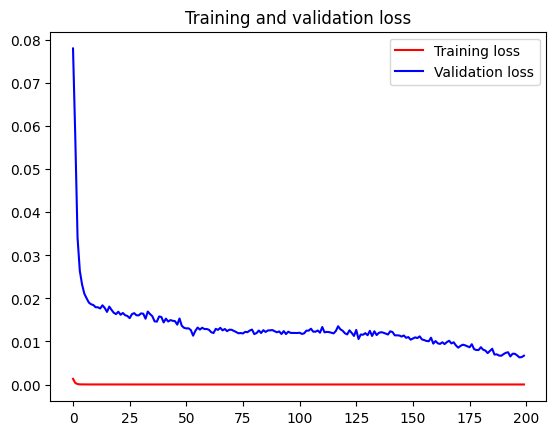

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

13/13 [==============================] - 0s 5ms/step


((931, 1), (391, 1))

In [ ]:

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  14.460793816571007
Train data MSE:  209.11455780537827
Train data MAE:  8.560945258439848
-------------------------------------------------------------------------------------
Test data RMSE:  341.13024040180943
Test data MSE:  116369.84091659631
Test data MAE:  224.29042732147136


In [ ]:
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9938007225096054
Test data explained variance regression score: 0.9610474355114892


In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9935238803916769
Test data R2 score: 0.9337026646550906


In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1354, 1)
Test predicted data:  (1354, 1)


In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
rnndf=closedf.tolist()
rnndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
rnndf=scaler.inverse_transform(rnndf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(rnndf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
import numpy as np

# Assuming you have 'original_close' in plotdf
original_close = plotdf['original_close']

# Generate synthetic open, high, and low values
original_open = original_close.shift(1)  # Use the previous close as the open
original_high = original_close.max()  # Use the maximum close value as the high
original_low = original_close.min()  # Use the minimum close value as the low

# Create a new DataFrame with open, high, low, and close values
candlestick_data = pd.DataFrame({
    'date': plotdf['date'],
    'open': original_open,
    'high': original_high,
    'low': original_low,
    'close': original_close
})

# Now you can use the 'candlestick_data' DataFrame to create the candlestick chart.


In [ ]:
import plotly.graph_objects as go

# Create a Candlestick trace for the original data
trace = go.Candlestick(
    x=candlestick_data['date'],
    open=candlestick_data['open'],
    high=candlestick_data['high'],
    low=candlestick_data['low'],
    close=candlestick_data['close'],
    name='Original Candlestick'
)

# Create a layout for the candlestick chart
layout = go.Layout(
    title='Candlestick Chart for Original Data',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=True
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Show the figure
fig.show()


In [ ]:
import plotly.graph_objects as go

# Downsampling the data for better visibility (e.g., every 10th data point)
downsampled_data = candlestick_data.iloc[::100]  # Adjust the downsample factor as needed

# Create a Candlestick trace for the downsampled data
trace = go.Candlestick(
    x=downsampled_data['date'],
    open=downsampled_data['open'],
    high=downsampled_data['high'],
    low=downsampled_data['low'],
    close=downsampled_data['close'],
    name='Original Candlestick'
)

# Create a layout for the candlestick chart
layout = go.Layout(
    title='Candlestick Chart for Downsampled Original Data',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=True
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Show the figure
fig.show()
